In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib # for reloading modules during development
from sklearn.metrics.pairwise import cosine_similarity
 
import synth_sequences

2023-04-08 14:38:53.981583: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
importlib.reload(synth_sequences);

Tests for SynthNNumbers:

In [12]:
P = {
    "batch_size" : 1024,
    "n" : 2,
    "operation" : "multiply",
    "limit" : 1,
    "distribution" : "uniform",
    "seed" : 42,
}

data_gen = synth_sequences.SynthNNumbers(**P)
x, y = data_gen.__getitem__(1)
print(x.shape, x.dtype, y.shape, y.dtype)

print(x[:5], y[:5])

(1024, 2) float32 (1024,) float32
[[ 0.5479121  -0.12224312]
 [ 0.71719587  0.39473605]
 [-0.8116453   0.9512447 ]
 [ 0.5222794   0.5721286 ]
 [-0.74377275 -0.09922812]] [-0.06697848  0.28310305 -0.77207327  0.298811    0.07380317]


Tests for SynthMathData:

(1024, 64, 2) float32 (1024,) float32


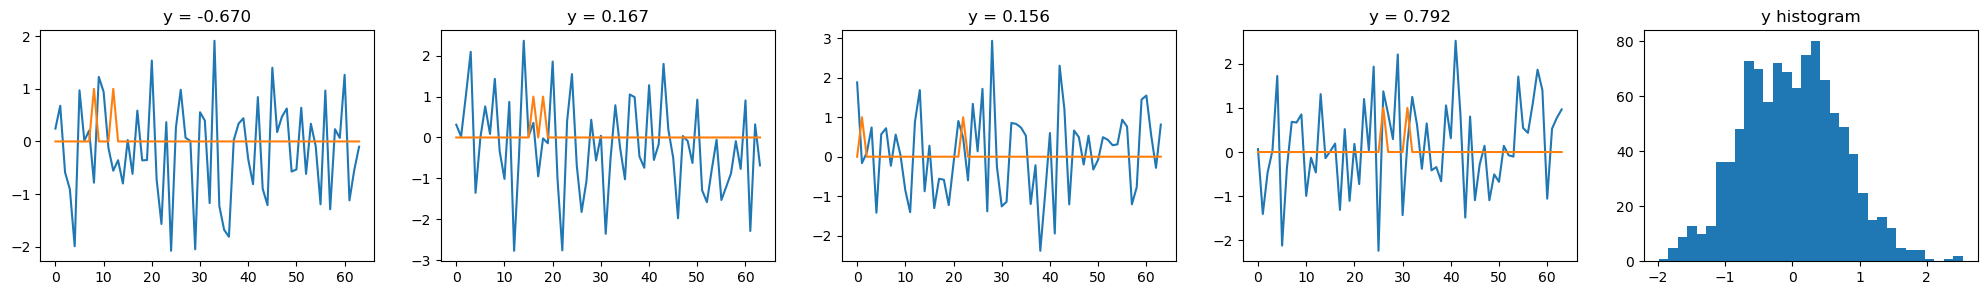

In [13]:
P = {
    "batch_size" : 1024,
    "seq_len" : 64,
    "operation" : "plus",
    "distribution" : "normal",
}

data_gen = synth_sequences.SynthMathData(P["batch_size"], P["seq_len"], P["operation"], P["distribution"], seed=43)
x, y = data_gen.__getitem__(1)
print(x.shape, x.dtype, y.shape, y.dtype)

fig, axs = plt.subplots(1, 5, figsize=(25,3))

for i in range(4):
    axs[i].plot(x[i]);
    axs[i].set_title(f"y = {y[i]:.3f}");

axs[-1].hist(y, bins=32);
axs[-1].set_title("y histogram")    ;

Tests for SynthCosSimData:

In [44]:
P = {
    "batch_size" : 32,
    "seq_len" : 64,
    "embedding_dim" : 128
}

data_gen = synth_sequences.SynthCosSimData(P["batch_size"], P["seq_len"], P["embedding_dim"], noise_factor=0.1, seed=43)
x, y = data_gen.__getitem__(1)
x.shape, x.dtype, y.shape, y.dtype

((32, 64, 128), dtype('float32'), (32,), dtype('int8'))

[1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1]


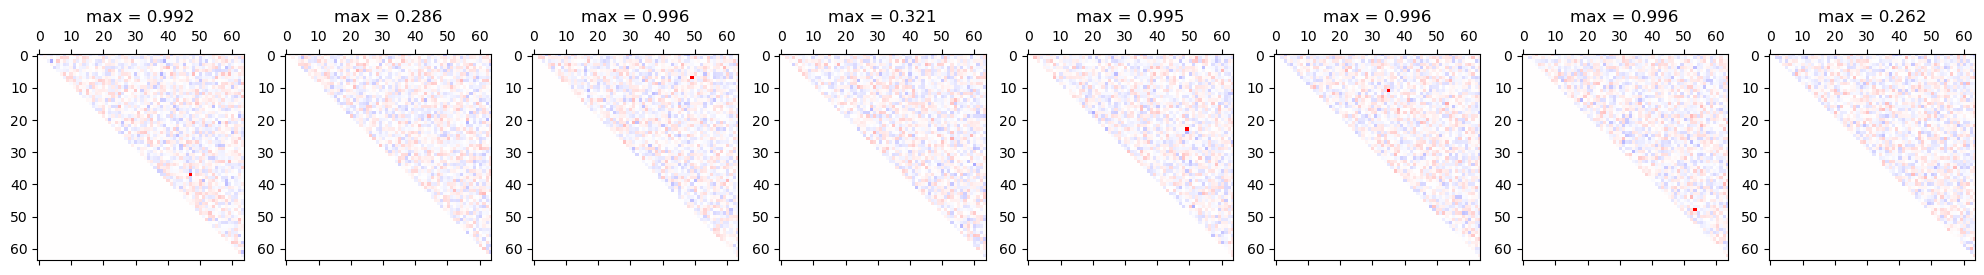

In [49]:
print(y)
fig, axs = plt.subplots(1, 8, figsize=(25,5))
for i in range(8):
    matr = np.triu(cosine_similarity(x[i]), 1)
    axs[i].matshow(matr, vmin=-1, vmax=1, cmap="bwr");
    axs[i].set_title(f"max = {np.max(matr):.3f}")